In [1]:
import pandas as pd
import re
import spacy
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

df = pd.read_csv("news_dataset.csv")


df["text"] = df["Title"].fillna("") + " " + df["Description"].fillna("")
X = df["text"]
y = df["Class Index"]

In [2]:
nlp = spacy.load("en_core_web_sm", disable=["ner", "parser"])

In [3]:
def spacy_clean(text):
    doc = nlp(text.lower())
    tokens = [
        token.lemma_ for token in doc
        if token.is_alpha and not token.is_stop
    ]
    return " ".join(tokens)

print("Cleaning text with spaCy... (this may take a few seconds)")
X_cleaned = X.apply(spacy_clean)


Cleaning text with spaCy... (this may take a few seconds)


In [4]:

tfidf = TfidfVectorizer(max_features=10000)
X_vec = tfidf.fit_transform(X_cleaned)

In [5]:

X_train, X_test, y_train, y_test = train_test_split(
    X_vec, y, test_size=0.2, random_state=42, stratify=y)

In [6]:
model = LogisticRegression(max_iter=500, multi_class="ovr")
model.fit(X_train, y_train)

c:\Users\akraj\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=500, multi_class='ovr')

In [7]:

y_pred = model.predict(X_test)
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))
print("\n🔢 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

✅ Accuracy: 0.9144200626959248

📊 Classification Report:
               precision    recall  f1-score   support

           1       0.93      0.90      0.91      6380
           2       0.95      0.98      0.97      6380
           3       0.88      0.89      0.89      6380
           4       0.89      0.89      0.89      6380

    accuracy                           0.91     25520
   macro avg       0.91      0.91      0.91     25520
weighted avg       0.91      0.91      0.91     25520


🔢 Confusion Matrix:
 [[5748  192  271  169]
 [  59 6261   31   29]
 [ 181   47 5678  474]
 [ 217   74  440 5649]]


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=200,      # number of trees
    max_depth=None,        # let trees grow deep
    random_state=42,
    n_jobs=-1              # use all CPU cores
)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))
print("\n🔢 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

✅ Accuracy: 0.8921238244514107

📊 Classification Report:
               precision    recall  f1-score   support

           1       0.91      0.89      0.90      6380
           2       0.92      0.97      0.94      6380
           3       0.86      0.87      0.87      6380
           4       0.88      0.84      0.86      6380

    accuracy                           0.89     25520
   macro avg       0.89      0.89      0.89     25520
weighted avg       0.89      0.89      0.89     25520


🔢 Confusion Matrix:
 [[5656  261  280  183]
 [  86 6185   54   55]
 [ 212  118 5543  507]
 [ 269  190  538 5383]]


In [11]:
# 5. Encode Labels
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
num_classes = len(label_encoder.classes_)

# Convert to one-hot for NN
y_onehot = to_categorical(y_encoded, num_classes=num_classes)

# ------------------------------------------------
# 6. Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_vec, y_onehot, test_size=0.2, random_state=42, stratify=y_encoded
)

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

model = Sequential([
    Dense(256, activation="relu", input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(128, activation="relu"),
    Dropout(0.3),
    Dense(num_classes, activation="softmax")
])

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()


history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=10,
    batch_size=64,
    verbose=1
)


y_pred_probs = model.predict(X_test)
y_pred = y_pred_probs.argmax(axis=1)
y_true = y_test.argmax(axis=1)

print("✅ Accuracy:", accuracy_score(y_true, y_pred))

c:\Users\akraj\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 256)            │     2,560,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,593,668 (9.89 MB)

 Trainable params: 2,593,668 (9.89 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1276/1276 ━━━━━━━━━━━━━━━━━━━━ 94s 66ms/step - accuracy: 0.8930 - loss: 0.3331 - val_accuracy: 0.9114 - val_loss: 0.2610
Epoch 2/10
1276/1276 ━━━━━━━━━━━━━━━━━━━━ 137s 63ms/step - accuracy: 0.9342 - loss: 0.1909 - val_accuracy: 0.9087 - val_loss: 0.2674
Epoch 3/10
1276/1276 ━━━━━━━━━━━━━━━━━━━━ 82s 64ms/step - accuracy: 0.9526 - loss: 0.1346 - val_accuracy: 0.9086 - val_loss: 0.3009
Epoch 4/10
1276/1276 ━━━━━━━━━━━━━━━━━━━━ 83s 65ms/step - accuracy: 0.9685 - loss: 0.0887 - val_accuracy: 0.9050 - val_loss: 0.3513
Epoch 5/10
1276/1276 ━━━━━━━━━━━━━━━━━━━━ 84s 65ms/step - accuracy: 0.9796 - loss: 0.0565 - val_accuracy: 0.9012 - val_loss: 0.4407
Epoch 6/10
1276/1276 ━━━━━━━━━━━━━━━━━━━━ 84s 66ms/step - accuracy: 0.9862 - loss: 0.0385 - val_accuracy: 0.9032 - val_loss: 0.4996
Epoch 7/10
1276/1276 ━━━━━━━━━━━━━━━━━━━━ 83s 65ms/step - accuracy: 0.9897 - loss: 0.0276 - val_accuracy: 0.9024 - val_loss: 0.5715
Epoch 8/10
1276/1276 ━━━━━━━━━━━━━━━━━━━━ 84s 66ms/step - accuracy: 0.9923 

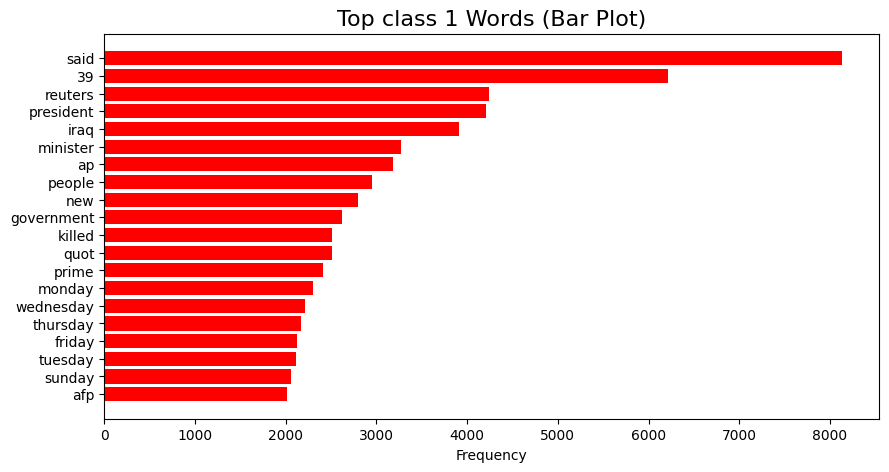

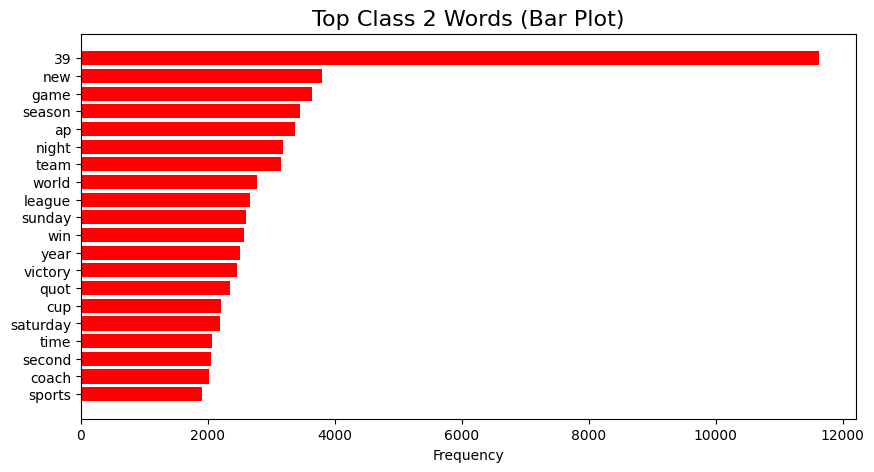

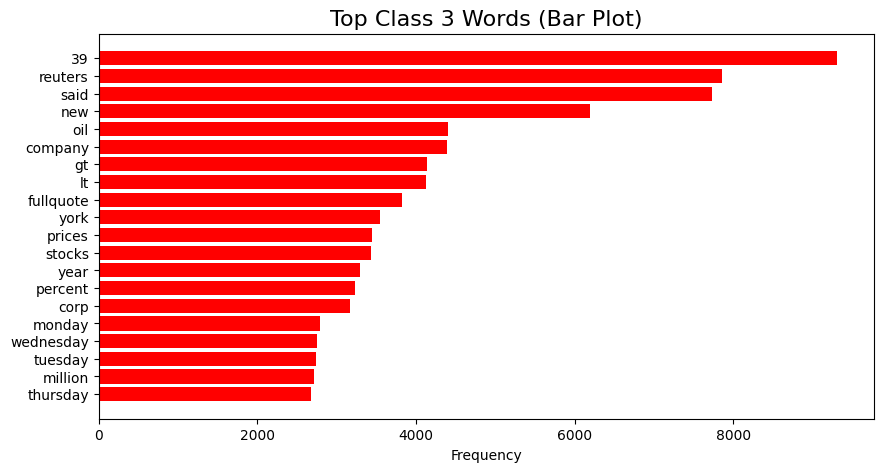

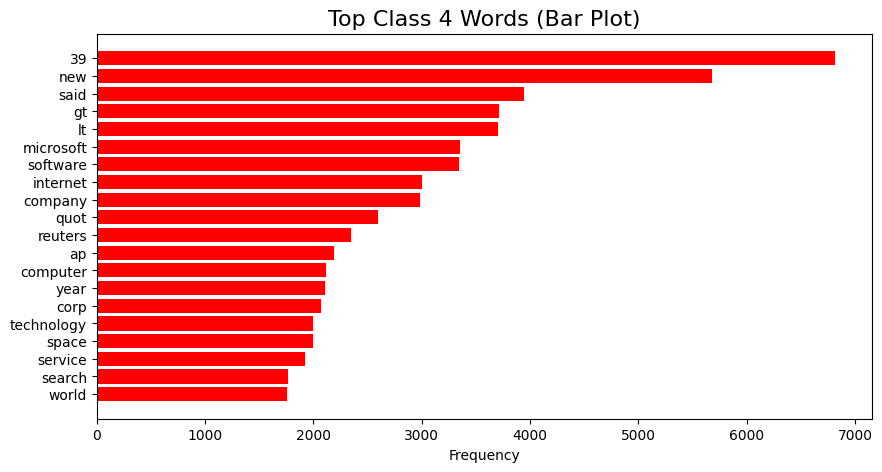

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
import matplotlib.pyplot as plt

def plot_top_words(reviews, title, n=20):
    vectorizer = CountVectorizer(stop_words="english")
    X = vectorizer.fit_transform(reviews)
    word_counts = X.toarray().sum(axis=0)
    vocab = vectorizer.get_feature_names_out()
    
    word_freq = dict(zip(vocab, word_counts))
    top_words = Counter(word_freq).most_common(n)
    
    words, counts = zip(*top_words)
    plt.figure(figsize=(10,5))
    plt.barh(words[::-1], counts[::-1], color="red")
    plt.title(title, fontsize=16)
    plt.xlabel("Frequency")
    plt.show()

plot_top_words(df[df["Class Index"]==1]["Description"], "Top class 1 Words (Bar Plot)")
plot_top_words(df[df["Class Index"]==2]["Description"], "Top Class 2 Words (Bar Plot)")
plot_top_words(df[df["Class Index"]==3]["Description"], "Top Class 3 Words (Bar Plot)")
plot_top_words(df[df["Class Index"]==4]["Description"], "Top Class 4 Words (Bar Plot)")